## Question 1.

### (i) Considering uncertainties / covariance for both the objects

So, here we are given with two position vectors representing the **Primary** & **Secondary** objects respectively and with the **Covariance Matrix** which gives the uncertainties. So, here we will take advantage of the **Linear Algebra**, which gives the direction and projection of Square-Matrix, such that we can decompose our problem into only few dimensions.

#### Singular Value Decomposition (SVD) & Principal Component Analysis (PCA) of the Covariance Matrix

In [177]:
import numpy as np
p_cm = np.array([[10000,0],[0,2500]]) # Primary object Confusion Matrix
s_cm = np.array([[625,0],[0,10000]])  # Secondary object Confusion Matrix
eigvalue_p, eigenvec_p = np.linalg.eig(p_cm)
eigvalue_s, eigenvec_s = np.linalg.eig(s_cm)
print('Eigenvalues of Covariance Matrix of Primary object:',eigvalue_p)
print('Eigenvectors of Covariance Matrix of Primary Object:', eigenvec_p)
print('Eigenvalues of Covariance Matrix of Secondary Object:', eigvalue_s)
print('Eigenvectors of Covariance Matrix of Secondary Object:',eigenvec_s)

Eigenvalues of Covariance Matrix of Primary object: [10000.  2500.]
Eigenvectors of Covariance Matrix of Primary Object: [[1. 0.]
 [0. 1.]]
Eigenvalues of Covariance Matrix of Secondary Object: [  625. 10000.]
Eigenvectors of Covariance Matrix of Secondary Object: [[1. 0.]
 [0. 1.]]


##### Finding the directions & uncertainties

Thus, for both **Primary** and **Secondary** objects we get two direction in which maximum variation occurs. So, instead of considering all other directions, we will exclusively work along these directions. Thus, we decompose our problem into just two directions, which also called **Principal Components**. And, the process is called **Singular Value Decomposition** or **SVD** .Now, if we see carefully the directions are nothing but **x** and **y** axes such that: **y** is $[0,1]^T$ and **x** is $[1,0]^T$. And, the eigenvalues are nothing but the uncertainties or standard deviation about the mean. We, will denote them by $\sigma_{px}$, $\sigma_{px}$, $\sigma_{sx}$, $\sigma_{sx}$.

So, finally we get the Standard Deviations as:

$2\sigma_{px} = 10,000$, $2\sigma_{py} = 2,500$

$2\sigma_{sx} = 625$, $2\sigma_{sy} = 10,000$

** As, discussed above we will focus on the x and y axes. And,as given that the diameter of the objects is $1$ m, so we assume that the **least count** for the position of both of them is $1$ m. Thus, the sample size should be about $200$, so that both the error ellipse can be covered. Certainly, for such a sample size the '**Normal Approximation**' is quite valid and we can proceed with the '**2-Sample Z-test**'.  

#### Two-Tailed Two-Sample Z-test

##### $1^{st}$ Hypothesis

$H_0$: The x-coordinates of Primary and Secondary object coincides.

$H_A$: The x-coordinates of Primary and Secondary object differs.

$\alpha = 0.05$

In [179]:
import scipy.stats
z1 = (200-150)/((5000)**2/200 + (625/2)**2/100)**0.5
p_1 = scipy.stats.norm.sf(abs(z1))*2
print('px = ' + str(p_1))

px = 0.8879709477319754


#### So, the Null hyothesis can't be rejected, that means there is a probablity that x-coordinates can be same for both of them.

##### $2^{nd}$ Hypothesis

$H_0$: The y-coordinates of Primary and Secondary object coincides.

$H_A$: The y-coordinates of Primary and Secondary object differs.

$\alpha = 0.05$

In [180]:
z2 = (150-100)/((5000)**2/200 + (2500/2)**2/100)**0.5
p_2 = scipy.stats.norm.sf(abs(z2))*2
print('py = ' + str(p_2))

py = 0.893929766752772


#### So, the Null hyothesis can't be rejected, that means there is a probablity that y-coordinates can be same for both of them.

Total Probability of Collision $=$ $2$ - p$_x$ - p$_y$ $=$ $0.218$

### Result:

#### This is the probability of not having any 'Type-I error', or it means that the this is probability of having the centres coinciding. And, if the centres coincides the collision occurs. Thus, the probability of collision between the two objects at the following instant is $0.218$. In Appendix its $0.21$.

### (ii) Considering uncertainties / covariance for the primary object only and secondary object covariance is assumed to be unavailable.

We will use the same hypothesis that where used in the previous section. This time the sample size will be very different. For the primary object, the sample-size will be $100$ points just because as we are not given the Secondary ellipse and not sure in which side of the ellipse there will be collision. But, we know that its only possible in one of the sides of the Primary ellipse. And, as we are not given the Secondary ellipse, so we can only select a sample size of very small number. Here, we will choose the sample size of $20$ . So, instead of doing a '**Z-Test**', we will prefer a '**t-Test**'.

#### Two-Sample Two-Tailed t-Test

##### $1^{st}$ Hypothesis

$H_0$: The x-coordinates of Primary and Secondary object coincides.

$H_A$: The x-coordinates of Primary and Secondary object differs.

$\alpha = 0.05$

In [192]:
nods = np.array([20,100])
total_salary = np.array([200,150])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = ttest_ind(total_salary,nods)
print('px =',2*p_value)
p1 = 2*p_value

px = 0.2699919467774166


#### So, the Null hyothesis can't be rejected, that means there is a probablity that x-coordinates can be same for both of them.

##### $2^{nd}$ Hypothesis

$H_0$: The y-coordinates of Primary and Secondary object coincides.

$H_A$: The y-coordinates of Primary and Secondary object differs.

$\alpha = 0.05$

In [190]:
nods = np.array([20,100])
total_salary = np.array([100,50])
from statsmodels.stats.proportion import proportions_ztest
z_score, P_value = ttest_ind(total_salary,nods)
print('py =',str(2*P_value))
p2 = 2*P_value

py = 1.5612365455237216


#### So, the Null hyothesis can't be rejected, that means there is a probablity that y-coordinates can be same for both of them.

Total Probability of Collision $=$ $2$ - p$_x$ - p$_y$ $=$ $0.169$

#### Result:

#### Thus, the probability of collision is around 0.169, this is not much different from the value of the previous section, where both the uncertainties where given. This is also close to the 'Area Method' in the Appendix that is 0.21.

### 2. Address and briefly explain the validation strategies for the 2D solution defined above

To summerise our steps in the above problem as follows:

(i) Finding the **Eigenvalues** and **Eignevectors** of the **Covarience Matrix**, to the get the directions of maximum variation, so that we can decompose our analysis to these directions. This step is crutial because, these are directions in which our object is most likely present. And, the amount of deviation, which are the eigenvalues is called as Uncetainty or Standard Deviation. This method is also called as **Principal Component Analysis (PCA)**.

(ii) After decomposing the probelm into specific directions, we did a **Hypothesis-testing** to find if our coordinates along these directions are different or same. If they are same, then there will be collision or else no collision. In Hypothesis-testing we have a test-statistics, based on which we find a p-value, which gives the probability of a **Type-I Error** . But, here we expected our  **Null Hypothesis** is True.

(iii) This is the main step, where we have to find the total probability of collision. AS, the sample-size chosen was $>20$, we can do a **Z-test** for better results. Also, we prefer a **Two-Tailed Test** here because we can compare the means either way and get a feasible result. 

(iv) Then in the scenario where only primary uncertainties we did a **t-test**. This is because, due to uncertain situation for Secondary object, we took only a sample-size of $20$. Thus, **t-test** is the only option when we have high uncertainty. 

### 3. Briefly explain the process of extending the 2D solution to a 3D case

For, a $3$D problem of two objects, we will have three directions, instead of two-directions. Thus, the **Covarience Matrix** will $3$x$3$ of the form:

$\Sigma = \begin{bmatrix} 2\sigma_{ix} & 0 & 0 \\ 0 & 2\sigma_{iy} & 0 \\ 0 & 0 & 2\sigma{iz} \end{bmatrix}$  

Eignevalues: $2\sigma_{ix}$, $2\sigma_{iy}$, $2\sigma_{iz}$ 

Eigenvectors: $[1\;0 \; 0]^T$, $[0\;1 \; 0]^T$, $[0\;0 \; 1]^T$

z$_x$ = $\frac{(\mu_{px} \;-\; \mu_{sx})}{\sqrt{\sigma_{px}^2/n_{px} \;+\; \sigma_{sx}^2/n_{sx}}}$,
z$_y$ = $\frac{(\mu_{py} \;-\; \mu_{sy})}{\sqrt{\sigma_{py}^2/n_{py} \;+\; \sigma_{sy}^2/n_{sy}}}$,
z$_z$ = $\frac{(\mu_{pz} \;-\; \mu_{sz})}{\sqrt{\sigma_{pz}^2/n_{pz} \;+\; \sigma_{sz}^2/n_{sz}}}$

We have to choose appropriate sample-size for all the directions denoted by n$_{px}$, n$_{py}$, n$_{pz}$,n$_{sx}$, n$_{sy}$, n$_{sz}$. **Python code** for finding out the **p-values** from all of the known **z-values** for a **2-Tailed Test** according to the sample-size as:

p$_x$ $=$ scipy.stats.norm.sf(abs(z$_x$))*$2$

p$_y$ $=$ scipy.stats.norm.sf(abs(z$_y$))*$2$

p$_z$ $=$ scipy.stats.norm.sf(abs(z$_z$))*$2$

Total Probability of Collision $=$ $3$ - p$_{x}$ - p$_{y}$ - p$_{z}$

If the **Covariance Matrix** is not Diagonal, then we have to diagonlize it and then proceed these steps.

## Question 2.

Lets say if we have an state error of $\delta_{px}$ w.r.t to **x** and $\delta_{py}$ w.r.t **y** for the **Primary object** such that:

$\text{p}_{vec} = \begin{bmatrix} 200 + \delta_{px}\\ 100 + \delta_{py}\end{bmatrix} = \begin{bmatrix} 200 \\ 100 \end{bmatrix} + \begin{bmatrix}  \delta_{px}\\ \delta_{py}\end{bmatrix}$

Then, the projection of the this error-state along the Covariance Matrix is:

$\begin{bmatrix}10,000 & 0 \\ 0 & 2,500 \end{bmatrix}.\begin{bmatrix} \delta_{px}\\ \delta_{py}\end{bmatrix} = \begin{bmatrix} 10000\delta_{px}\\ 2500\delta_{py}\end{bmatrix} $

So, if the projection is an **Eigenstate** of the **Covariance Matrix**, then we confirm that its a error distribution similar to the **Covariance Matrix**. Still, as we can always decompose the state-error vector along the $x$ and $y$ axes such that:

$\begin{bmatrix} \delta_{px}\\ \delta_{py}\end{bmatrix} =  \delta_{px}\begin{bmatrix}1\\ 0\end{bmatrix} + \delta_{py}\begin{bmatrix} 0\\ 1\end{bmatrix}$

Thus, if the non-conformity occurs, then we have to decompose our state-error vector into the basis vectors of the **Covariance Matrix**. And, in this way we expect that the state-error vector is a resultant of the **covariance Matrix's Eigenvectors**.  

## Appendix: 
#### (Extra not included in solution just for reference)

### Area of Intersection Method

As, geometrically the collision happens only when the particles are present in the intersection region. So, we can gain the total probability of collision by the ratio of **Area of Intersction** of the error-ellipses and the **Total Area**. The **Python code** finding these areas and plotting is: 

In [8]:
from matplotlib import pyplot as plt
from shapely.geometry.point import Point
from shapely import affinity
from matplotlib.patches import Polygon

def create_ellipse(center, lengths, angle=0):
    circ = Point(center).buffer(1)
    ell = affinity.scale(circ, int(lengths[0]), int(lengths[1]))
    ellr = affinity.rotate(ell, angle)
    return ellr

In [9]:
##first ellipse in blue
import numpy as np
ellipse1 = create_ellipse((150,150),(50,100),0)
verts1 = np.array(ellipse1.exterior.coords.xy)
patch1 = Polygon(verts1.T, color = 'blue', alpha = 0.5)

In [10]:
##second ellipse in red    
ellipse2 = create_ellipse((200,100),(100,50),0)
verts2 = np.array(ellipse2.exterior.coords.xy)
patch2 = Polygon(verts2.T,color = 'red', alpha = 0.5)

In [5]:
##the intersect will be outlined in black
intersect = ellipse1.intersection(ellipse2)
verts3 = np.array(intersect.exterior.coords.xy)
patch3 = Polygon(verts3.T, facecolor = 'none', edgecolor = 'black')

$\text{Probability of Collision} = \frac{\text{Area of Intersection between the two objects}}{\text{Area of Primary Ellipse + Area of Secondary Ellipse}} = 0.21$

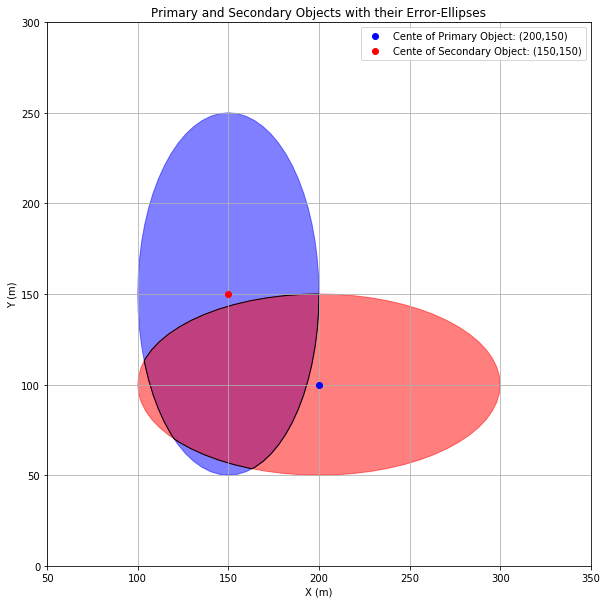

In [6]:
## Plotting the ellipses
fig,ax = plt.subplots()
ax.set_xlim([50,350])
ax.set_ylim([0,300])
ax.set_aspect('equal')
ax.add_patch(patch1)
ax.add_patch(patch2)
ax.add_patch(patch3)
plt.plot(200,100,'bo', label='Cente of Primary Object: (200,150)')
plt.plot(150,150,'ro',label='Cente of Secondary Object: (150,150)')
plt.rcParams['figure.figsize'] = [10,10]
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.legend()
plt.title('Primary and Secondary Objects with their Error-Ellipses')
plt.show()